In [1]:
%cd /content/drive/MyDrive/Colab Notebooks/Algorithms in Computational Biology/hw6

/content/drive/MyDrive/Colab Notebooks/Algorithms in Computational Biology/hw6




---


**Part I: Brute-Force Motif Search**


---



In [2]:
test = ["GGCGTTCAGGCA","AAGAATCAGTCA","CAAGGAGTTCGC","CACGTCAATCAC","CAATAATATTCG"]

In [3]:
def most_frequent(List):
    counter = 0
    num = List[0]
    countTable=[]
    letter=[]

    for i in List:
        curr_frequency = List.count(i)
        countTable.append(curr_frequency)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
            
    for i in range(len(countTable)): # this step is to check if we have 2 or more letter have same count in a column
      if countTable[i] == max(countTable):
        if List[i] not in letter:
          letter.append(List[i])

    if len(letter) == 1:
      return num
    else:
      return letter

In [4]:
a= [1,1,1,2,2,2,3,3,3]
print(most_frequent(a))

[1, 2, 3]


In [38]:
def get_consensus(motifs):
  ## get consensus string
  consensus = []

  for i in range(len(motifs[0])):
    temp=[]
    for j in motifs:
      temp.append(j[i])

    consensus.append(most_frequent(temp))
    
  return consensus

In [6]:
get_consensus(test)

['C',
 'A',
 ['C', 'A'],
 'G',
 ['T', 'A'],
 ['T', 'A'],
 'C',
 'A',
 'T',
 ['T', 'C'],
 'C',
 ['A', 'C']]

In [7]:
#https://stackoverflow.com/questions/4233742/permutations-of-a-list-of-lists
from itertools import product
a = ['C', 'A', ['C', 'A']]
print(list(product(*a)))

for i in list(product(*a)):
  print(i)

[('C', 'A', 'C'), ('C', 'A', 'A')]
('C', 'A', 'C')
('C', 'A', 'A')


In [8]:
a = ('C', 'A', 'C')
b = ["GGCGTTCAGGCA","AAGAATCAGTCA"]
min = 100000
count = 0
ans = []
min_list=[]
temp_sum = []
ans2 = []
for x in range(len(b)):
  for k in range(len(b[x])-3+1):
    count = 0
    c = b[x][0+k:3+k]
    for l in range(len(a)):
      if c[l]!=a[l]:
        count+=1
    if count < min:
      ans.clear()
      min_list.clear()
      min = count
      ans.append(c)
      min_list.append(min)
      
  temp_sum.append(min_list[0])
  min = 100000
  ans2.append(ans[0])
  
print(ans2)
print(temp_sum)


['CAG', 'CAG']
[1, 1]


In [9]:
def BF_search(List, kMer):
  ## get consensus
  consensus = get_consensus(List)
  # print(consensus)
  ## get all kmer consensus
  from itertools import product
  kmer_consensus =[]
  
  for i in range(len(consensus)-kMer+1):
    a = consensus[0+i:kMer+i]
    for i in list(product(*a)):
      kmer_consensus.append(i)
  # print(kmer_consensus)
  
  # return best string (min total score)
  final_output=[]
  score = 10000
  for i in kmer_consensus: # iterate each k mer consensus
    temp_sum = [] # this will store minmum score for every string in the List
    ans2 = [] # this will store optimal k mer consensus for every string in the List
    min=100000
    for j in List: # iterate each string
      ans = []
      min_list=[]
      for k in range(len(j)-kMer+1): # go through every sliding window in string
        count = 0
        a = j[0+k:kMer+k]
        for l in range(len(i)): # compare every sliding window to the k-mer consensus
          if a[l]!=i[l]:
            count+=1
        if count < min: # find optimal k-mer consensus in each string
          ans.clear()
          min_list.clear()
          min = count
          ans.append(a)
          min_list.append(min)

      temp_sum.append(min_list[0])
      min = 100000
      ans2.append(ans[0])
    
    Sum_temp_sum = sum(temp_sum)  
    if Sum_temp_sum < score:
      final_output.clear()
      score = Sum_temp_sum
      final_output.append(ans2)
   
  return final_output


      
    

In [10]:
print(BF_search(test,3))

[['CAG', 'GAA', 'CAA', 'CAA', 'CAA']]




---
Part II: Motif Search using greedy algorithm


---




In [11]:
test2 = ["GGCGTTCAGGCA", "AAGAATCAGTCA", "CAAGGAGTTCGC", "CACGTCAATCAC", "CAATAATATTCG"]

In [12]:
def count_matrix(matrix):
  count_matrix = [[],[],[],[]] # to store a t c g
  
  countA = 1 # to avoid in prob step we have 0 value
  countT = 1 
  countC = 1 
  countG = 1 

  for i in range(len(matrix[0])): #select char
    for k in  range(len(matrix)): #select row
      if matrix[k][i] == "A":
        countA += 1
      elif matrix[k][i] == "T":
        countT += 1
      elif matrix[k][i] == "C":
        countC += 1
      elif matrix[k][i] == "G":
        countG += 1

    count_matrix[0].append(countA) # A
    count_matrix[1].append(countT) # T
    count_matrix[2].append(countC) # C
    count_matrix[3].append(countG) # G

    # reset atcg count for next iteration
    countA = 1 
    countT = 1 
    countC = 1 
    countG = 1


  return count_matrix

In [13]:
b = ["AAA"]
print(count_matrix(b))

[[2, 2, 2], [1, 1, 1], [1, 1, 1], [1, 1, 1]]


In [14]:
def prob_matrix(matrix):
  count = 0
  prob_matrix = [[],[],[],[]] # to store a t c g prob

  for i in range(len(matrix)):
    count += matrix[i][0]

  
  for i in range(len(matrix[0])): #select char
    for k in  range(len(matrix)):
      prob_matrix[k].append(matrix[k][i]/count)


  return prob_matrix

In [15]:
c = [[2, 5, 3], [1, 1, 1], [4, 1, 3], [2, 2, 2]]
print(prob_matrix(c))

[[0.2222222222222222, 0.5555555555555556, 0.3333333333333333], [0.1111111111111111, 0.1111111111111111, 0.1111111111111111], [0.4444444444444444, 0.1111111111111111, 0.3333333333333333], [0.2222222222222222, 0.2222222222222222, 0.2222222222222222]]


In [16]:
def kMerList(String,kMer):
  kMerList = []
  for i in range(len(String)-kMer+1):
    kMerList.append(String[0+i:kMer+i])
  return kMerList


In [17]:
print(kMerList("GGCGTTCAGGCA",3))

['GGC', 'GCG', 'CGT', 'GTT', 'TTC', 'TCA', 'CAG', 'AGG', 'GGC', 'GCA']


In [18]:
def scoreConsensus(List):
  score = 0
  temp = []
  for i in range(len(List[0])):
    temp.clear()
    for j in range(len(List)):
      temp.append(List[j][i])

    mostFreqChar = most_frequent(temp)

    for j in range(len(List)):
      if List[j][i] != mostFreqChar[0]:
        score+=1
  return score

In [19]:
a = ['GGC', 'AAG', 'CAA', 'CAC', 'CAA']
scoreConsensus(a)

6

In [20]:
def GreedyMotifSearch(List, kMer, t):
  indexList = ["A","T","C","G"]
  # initial best motifs, first k mer in each seq
  best_motifs = [i[0:kMer] for i in List] 
  # initial score for the best motifs
  score = scoreConsensus(best_motifs)


  temp_motifs = [] # to score possibe best motif set through iteration
  temp = [] # to score possibe best motif in seqX through iteration

  kMerList_seq1 = kMerList(List[0],kMer) # every kmer for seq1
  for i in kMerList_seq1[1:]: # we already use first kmer-seq in best_motifs, so start at second one
    temp_motifs.append(i)
    for j in range(1, len(List)): # iterate the rest of the seq(exclude seq1)
      temp_score = 0
      temp_score2 = 1
      count_matrix_temp_motifs = count_matrix(temp_motifs)
      prob_matrix_temp_motifs = prob_matrix(count_matrix_temp_motifs)

      kMerList_ = kMerList(List[j],kMer) # through iteration it wil be kmerList for seq2 seq3 ....
      for k in kMerList_:
  
        for l in range(len(k)): # get index, bc my prob_matrix is build base on index -->  A T C G
 
          temp_score2 *= prob_matrix_temp_motifs[indexList.index(k[l])][l]
 
        if temp_score2 > temp_score: # try to get the best motif in seqX
          temp_score = temp_score2
          temp.clear()
          temp.append(k)
        temp_score2=1
      temp_motifs.append(temp[0]) # after searching best motif in seqX, update to temp_motifs
  
    if scoreConsensus(temp_motifs) < score: # means temp_motifs have better consensus compare to the previous best consensus
      best_motifs.clear()
      score = scoreConsensus(temp_motifs)
      for i in temp_motifs:
        best_motifs.append(i)
      temp_motifs.clear()

    else:
      temp_motifs.clear() # not better then the previous one just discard


  return best_motifs

In [21]:
print(GreedyMotifSearch(test2, 3, 5))

['TTC', 'ATC', 'TTC', 'ATC', 'TTC']




---


**Part III: Motif Search using randomized search algorithm**


---



In [22]:
test3 = ["CGCCCCTCTCGGGGGTGTTCAGTAAACGGCCA", "GGGCGAGGTATGTGTAAGTGCCAAGGTGCCAG", "TAGTACCGAGACCGAAAGAAGTATACAGGCGT", "TAGATCAAGTTTCAGGTGCACGTCGGTGAACC", "AATCCACCAGCTCCACGTGCAATGTTGGCCTA"]

In [32]:
def RandomizedMotifSearch(List, kMer, t, iterate):
  import random
  indexList = ["A","T","C","G"]
  # initial best motifs
  best_motifs = [] 
  # initial score 
  score = 10000000000
  count = 0
  while count < iterate:
  # randomly select k-mer motifs
    temp_motifs = []
    new_motifs = []
    temp=[]
    randint_para = len(List[0])-kMer+1
    for i in List:
      KMerList = kMerList(i,kMer)
      temp_motifs.append(KMerList[random.randint(0, randint_para-1)])
    
    for i in temp_motifs: best_motifs.append(i)
    if  scoreConsensus(temp_motifs) < score:
      score = scoreConsensus(temp_motifs)
      
   
    #build count and prob matrix for temp_motifs
    count_matrix_temp_motifs = count_matrix(temp_motifs)
    prob_matrix_temp_motifs = prob_matrix(count_matrix_temp_motifs)

    # find profile most probable k-mer from each dna strings, and generate new motif
    for i in range(len(List)):
      temp_score = 0
      temp_score2 = 1

      kMerList_ = kMerList(List[i],kMer)
      for k in kMerList_:
        for l in range(len(k)): # get index, bc my prob_matrix is build base on index -->  A T C G
          temp_score2 *= prob_matrix_temp_motifs[indexList.index(k[l])][l]

        if temp_score2 > temp_score: # try to get the best motif in seqX
          temp_score = temp_score2
          temp.clear()
          temp.append(k)
        temp_score2=1
      new_motifs.append(temp[0])

    if scoreConsensus(new_motifs) < score:
      score = scoreConsensus(new_motifs)
      best_motifs.clear()
      for i in new_motifs:
        best_motifs.append(i)
      new_motifs.clear()
      temp_motifs.clear()
      count+=1
      
    else:
      new_motifs.clear()
      temp_motifs.clear()
      count+=1
    
    return best_motifs,score

In [24]:
print(RandomizedMotifSearch(test3,8,5,1000))

(['TAAACGGC', 'TAAGTGCC', 'TACAGGCG', 'TCAGGTGC', 'TCCACCAG'], 16)


In [25]:
test = ['AACGGCCA', 'GGCGAGGT', 'TACAGGCG', 'GTCGGTGA', 'TTGGCCTA']
print(scoreConsensus(test))

18




---


**Part IV : Algorithm Summary**


---



In [26]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 4.1 MB/s 


In [36]:
from Bio import SeqIO
test_arab = []
for seq_record in SeqIO.parse("hw.fa", "fasta"):
  seq = str(seq_record.seq)
  test_arab.append(seq)
print(len(test_arab))



113


**BF search**


---



In [28]:
import timeit

start = timeit.default_timer()


a = BF_search(test_arab, 10)

print(get_consensus(*a))


stop = timeit.default_timer()

print('Time: ', stop - start) 

['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'T']
Time:  69.79233765000001


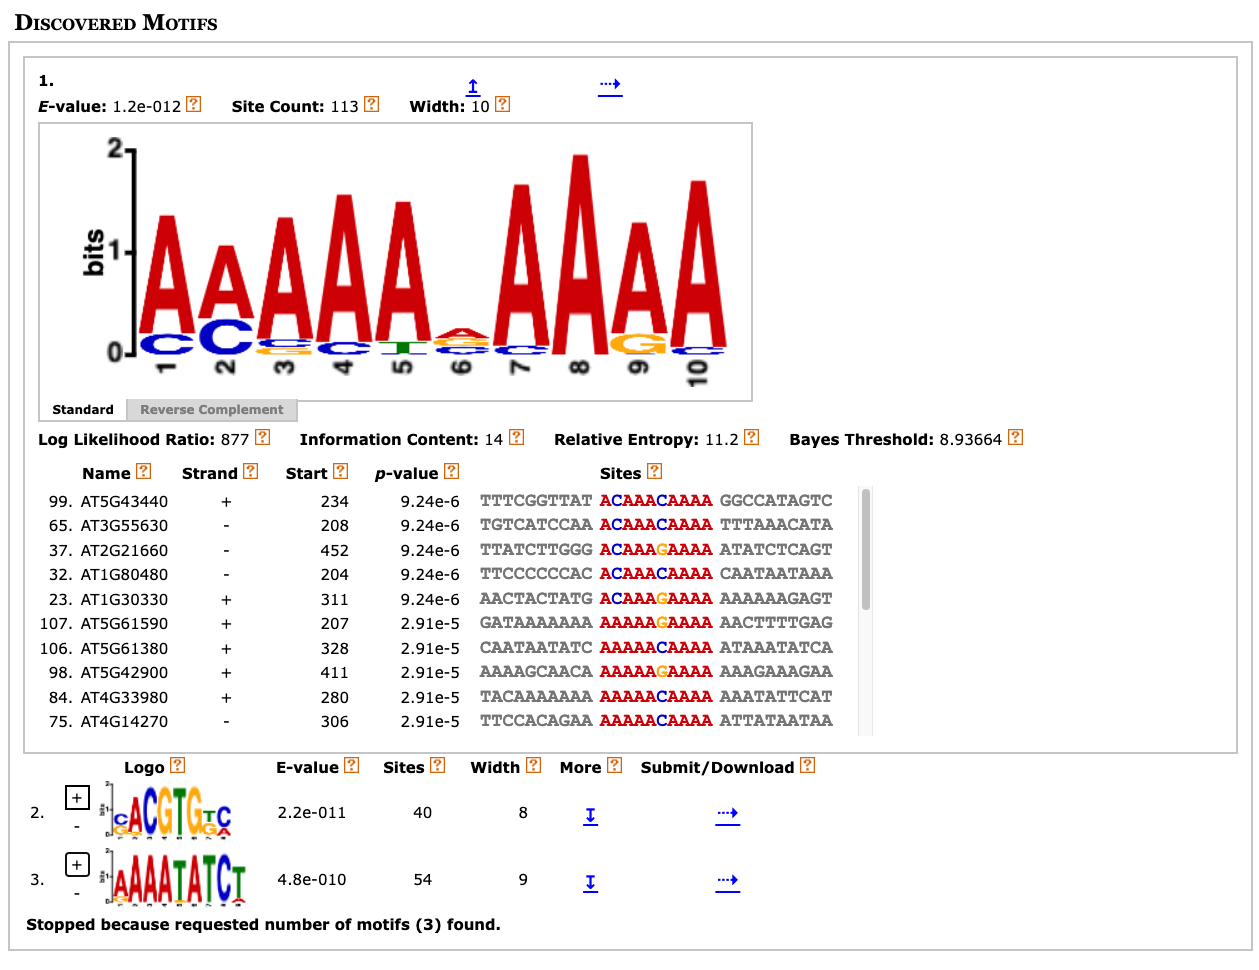

**Greedy search**


---



In [29]:
import timeit

start = timeit.default_timer()


a = GreedyMotifSearch(test_arab, 10, 113)

print(get_consensus(a))


stop = timeit.default_timer()

print('Time: ', stop - start) 

['T', 'T', 'T', 'T', 'A', 'T', 'T', 'T', 'T', 'T']
Time:  77.37187140099999


**Randomized search**

---



In [ ]:
import timeit

start = timeit.default_timer()


a = RandomizedMotifSearch(test_arab, 10, 113,1000)

print(get_consensus(a))


stop = timeit.default_timer()

print('Time: ', stop - start) 